<a href="https://colab.research.google.com/github/OmarEmad313/Bank-Marketing-Campaign/blob/main/Bank_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
#Models:
from sklearn import svm

#Deep learning
from keras.models import Sequential
from keras.layers import Dense, Activation


In [4]:
df= pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
#It shows the features with continuous values
df.describe()
#print(df["deposit"])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Data Exploration
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [ ]:
# checcking data types
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


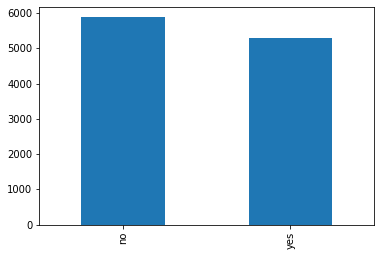

In [ ]:
#Data visualization
y_plot = df["deposit"].value_counts().plot(kind='bar')
print(y_plot)
#edu_plot = df["education"].value_counts().plot(kind='bar')
#print(edu_plot)
#scatter = df.plot(kind='scatter',x='age',y='balance')
#print(scatter)

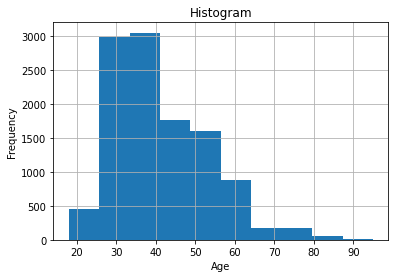

In [ ]:
# Age distribution
df.age.hist()
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution')

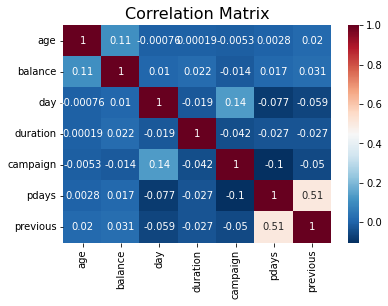

In [ ]:
# Checking feature Correlations

cor = df.corr()
num_df = df.select_dtypes(exclude="object")
corr_num = num_df.corr()
sns.heatmap(corr_num, annot=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [5]:
# Encoding Target variable
target = {"deposit":     {"yes": 1, "no": 0}}
df1 = df.replace(target)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [6]:
# assignning new data set
# dropping columns with high correlation to target
df2 = df1.drop(["duration"],axis=1) #cor>0.40

In [7]:
# Checking of missing value
count_nan = df2.isnull().sum()
print(count_nan[count_nan>0]) #no missing values

Series([], dtype: int64)


In [8]:
#checking class balance
df.deposit.value_counts()/df.deposit.count()

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [9]:
#I'm going to use StratifiedShuffleSplit to preserve the class proportions.
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index] #to select only rows (with all columns) we dont need comma and colon.
    testdf= df.loc[test_index]

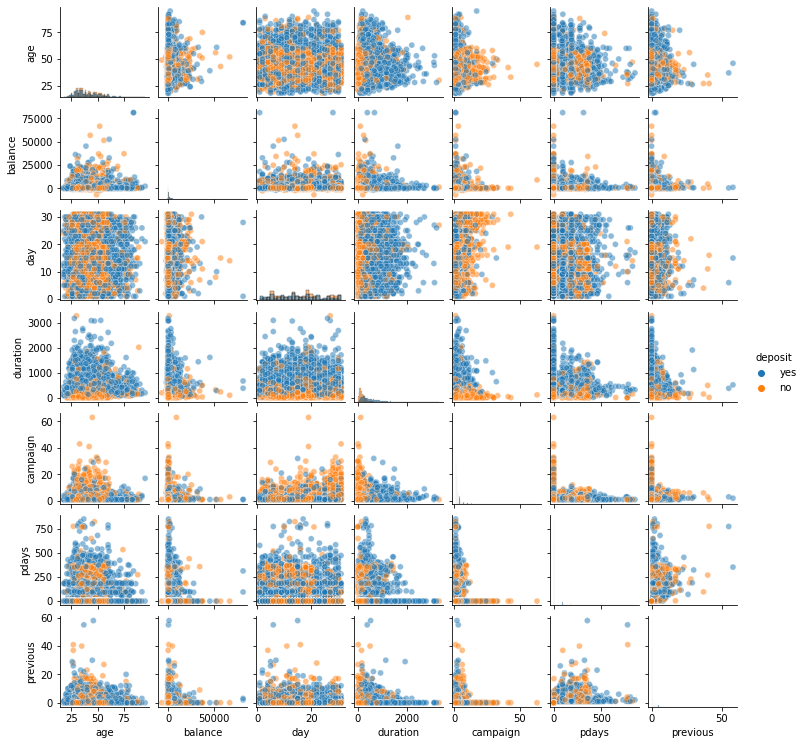

In [41]:
# Scatterplots to search for linear and non-linear relationships and histograms.
sns.pairplot(traindf, diag_kind='hist',  hue= 'deposit', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})


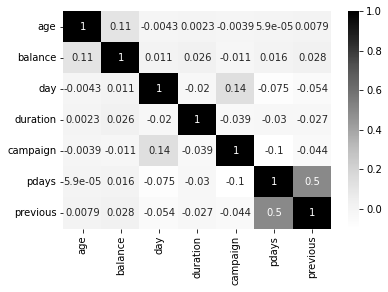

In [42]:
#Pearson’s Correlations, which measures the strength of a linear relationship
sns.heatmap(traindf.corr(method='pearson'), cmap="Greys", annot=True)

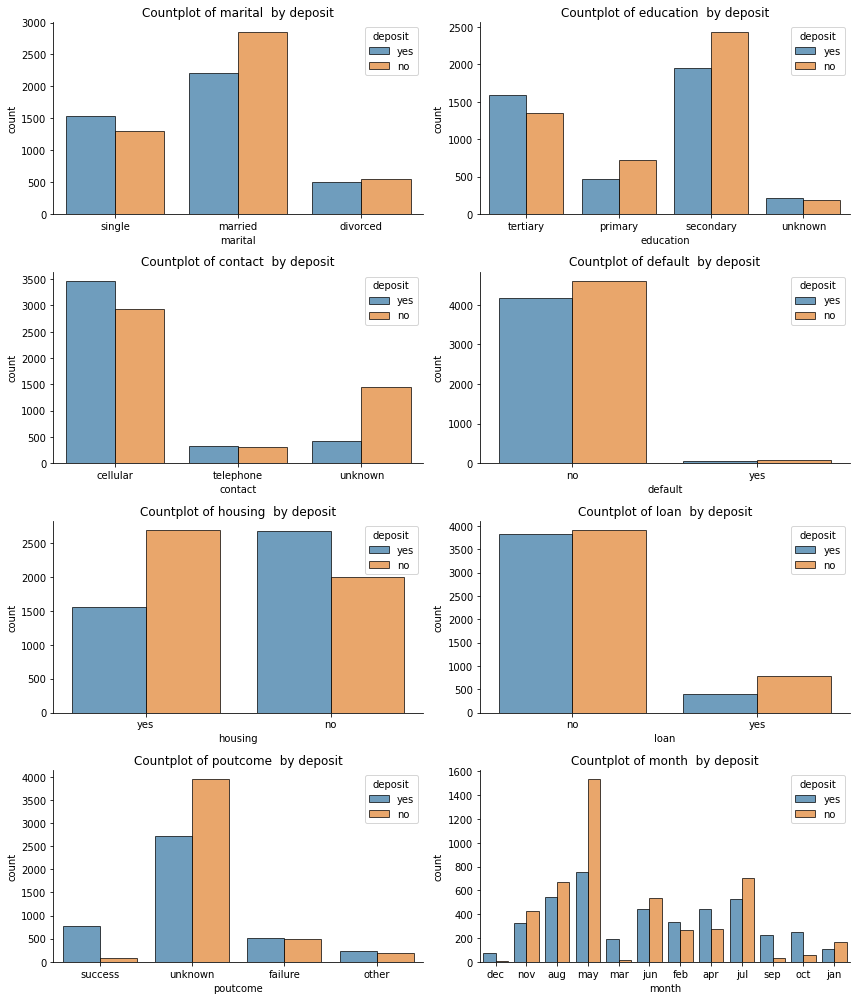

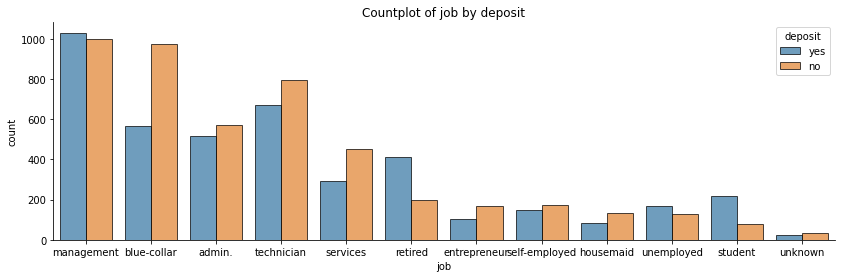

In [43]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor="black", alpha=0.7, data=traindf)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=traindf)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

In [31]:

# Encoding Catergorical values
data = pd.get_dummies(df2, columns=["job", "marital","education","default","housing","loan","contact","month","poutcome" ])
data.describe
data.columns
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,n_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,0


In [11]:
# Splitting data for training and testing
#Removing the target from the data set
X = data.drop('deposit', axis=1)
#adding only the target row to y
y = data['deposit']

In [12]:
# Create training and testing variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7813, 50) (7813,)
(3349, 50) (3349,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
svm_model = svm.SVC(gamma='auto')
params = {
    'C': [100],
    'gamma': [0.001],
    'kernel': ['rbf']
}

rf_grid = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=params,
    cv=3,
    n_jobs=4,
    verbose=2
)

rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}





    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']

---


Result:
{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


In [33]:
svm_pred = rf_grid.predict(X_test)
# model Evaluation
confusionMatrix=confusion_matrix(svm_pred, y_test)
# Classification Report & Confusion matrix
print(confusionMatrix)
print(classification_report(svm_pred, y_test))

Accuracy: 0.7336518363690654
[[1562  683]
 [ 209  895]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2245
           1       0.57      0.81      0.67      1104

    accuracy                           0.73      3349
   macro avg       0.72      0.75      0.72      3349
weighted avg       0.78      0.73      0.74      3349



Text(0.5, 15.0, 'Predicted label')

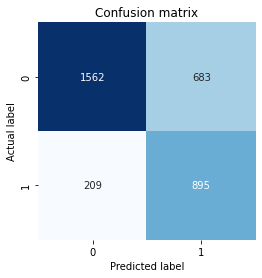

In [35]:
sns.heatmap(confusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
print('Train Accuracy:   {0:.1f}%'.format(rf_grid.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(rf_grid.score(X_test, y_test)*100))

Train Accuracy:   73.9%
Test Accuracy:    73.4%


In [37]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 50))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)


782/782 [==============================] - 1s 1ms/step - loss: 0.5201 - accuracy: 0.7477


In [38]:
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
confusionMatrix = confusion_matrix(y_test, y_pred)

Train score: 0.5201287865638733
Train accuracy: 0.747728168964386
********************
335/335 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7232
Test score: 0.5567848682403564
Test accuracy: 0.7232009768486023


Text(0.5, 15.0, 'Predicted label')

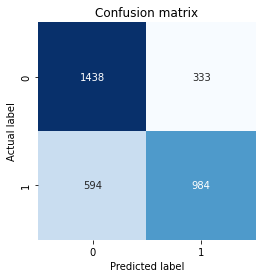

In [39]:
sns.heatmap(confusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')